In [1]:
# import libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns 
import html
from bs4 import BeautifulSoup
import requests
import os
from selenium import webdriver
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import warnings; warnings.simplefilter('ignore')
from VE_scraper_functions import *
from chromedriver_py import binary_path # this will get you the path variable
from selenium.webdriver.common.by import By
import time
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel.Lang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# import dataset
path = "park_scrape_content_dataset.xlsx"
park_scrape_dataset2 = pd.read_excel(path)
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page                                            content website location  park
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
3               3      3  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
4               4      4  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
...           ...    ...                                              

In [3]:
## convert all text to lowercase to avoid case sensitivity issues
park_scrape_dataset2['content'] = park_scrape_dataset2['content'].str.lower()
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page                                            content website location  park
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
3               3      3  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
4               4      4  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
...           ...    ...                                              

In [4]:
EV_words =  [
       "charger", "electric vehicle", " ev ", "charging station", "alternative fuel"]

In [5]:
def count_EV_words(text):
    word_counts = {word: text.lower().count(word) for word in EV_words}
    return word_counts
word_counts_df = park_scrape_dataset2['content'].apply(count_EV_words).apply(pd.Series)
word_counts_df['total'] = word_counts_df.sum(axis=1)
word_counts_df.head()

,charger,electric vehicle,ev,charging station,alternative fuel,total
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [6]:
park_scrape_dataset2 = pd.concat([park_scrape_dataset2, word_counts_df], axis=1)
park_scrape_dataset2 = park_scrape_dataset2.drop("content", axis="columns")
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page website location  park  charger  electric vehicle   ev   charging station  alternative fuel  total
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI        0                 0     0                 0                 0      0
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI        0                 0     0                 0                 0      0
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI        0                 0     0                 0                 0      0
3               3      3  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI        0                 0     0                 0                 0      0
4               4      4  https://home.nps.gov/abli/planyourvisit/direct...              NaN  A

In [7]:
park_scrape_dataset2.to_csv("EVtest.csv")

In [8]:
path = "clusterlookup.csv"
clusters = pd.read_csv(path)
clusters.head

<bound method NDFrame.head of     Park Alpha                                      NPS Full Name Region  FinalCluster                   Label
0         ABLI  Abraham Lincoln Birthplace National Historical...    SER             8  High Visitation, Rural
1         ACAD                               Acadia National Park    NER             1            Transit Park
2         ADAM                     Adams National Historical Park    NER             1            Transit Park
3         AFBG            African Burial Ground National Monument    NER             2             Urban Sites
4         AGFO                Agate Fossil Beds National Monument    MWR             7   Low Visitation, Rural
..         ...                                                ...    ...           ...                     ...
383       WWIM                               World War I Memorial    NCR             2             Urban Sites
384       YELL                          Yellowstone National Park    IMR          

In [9]:
park_word_counts = park_scrape_dataset2.groupby('park')[EV_words].sum()
park_word_counts['total'] = park_word_counts.sum(axis=1)
park_word_counts.head

<bound method NDFrame.head of       charger  electric vehicle   ev   charging station  alternative fuel  total
park                                                                            
ABLI        0                 0     0                 0                 0      0
ACAD        0                 0     0                 0                 0      0
ADAM        0                 0     0                 0                 0      0
AFBG        0                 0     0                 0                 0      0
AGFO        0                 0     0                 0                 0      0
...       ...               ...   ...               ...               ...    ...
YELL        0                 2     1                 4                27     34
YOSE        0                 1     2                 3                 1      7
YUCH        0                 0     0                 0                 0      0
YUHO        0                 0     0                 0                 0      

In [10]:
clustersubset = clusters[['Park Alpha', "FinalCluster", "Label"]]
clustersubset.rename(columns={'Park Alpha':"park"}, inplace = True)
clusterparks = pd.merge(park_word_counts, clustersubset, on="park", how="left")
clusterparks.head

<bound method NDFrame.head of      park  charger  electric vehicle   ev   charging station  alternative fuel  total  FinalCluster                   Label
0    ABLI        0                 0     0                 0                 0      0           8.0  High Visitation, Rural
1    ACAD        0                 0     0                 0                 0      0           1.0            Transit Park
2    ADAM        0                 0     0                 0                 0      0           1.0            Transit Park
3    AFBG        0                 0     0                 0                 0      0           2.0             Urban Sites
4    AGFO        0                 0     0                 0                 0      0           7.0   Low Visitation, Rural
..    ...      ...               ...   ...               ...               ...    ...           ...                     ...
415  YELL        0                 2     1                 4                27     34           8.0  H

In [11]:
clusterparks.to_csv("EVbypark.csv")

In [12]:
total_parks_counts = clusterparks.groupby('Label').size().reset_index(name='Total_Parks')
total_parks_counts['Total_Parks'] = total_parks_counts['Total_Parks'].astype(int) 
filtered_df = clusterparks[clusterparks['total'] > 1]
ev_parks_counts = filtered_df.groupby('Label').size().reset_index(name='EV_Parks')
label_counts = pd.merge(total_parks_counts, ev_parks_counts, on='Label', how='left')
label_counts['EV_Parks'].fillna(0, inplace=True)
label_counts['Percent_EV'] = round((label_counts['EV_Parks'] / label_counts['Total_Parks']) * 100, 1)
label_counts['EV_Parks'] = label_counts['EV_Parks'].astype(int)
label_counts.head()

,Label,Total_Parks,EV_Parks,Percent_EV
0,High Seasonality,43,5,11.6
1,"High Visitation, Rural",56,13,23.2
2,"High Visitation, Urban",37,5,13.5
3,Limited Access,29,4,13.8
4,"Low Visitation, Rural",54,3,5.6


In [13]:
total_row = label_counts.sum(numeric_only=True)
total_row['Label'] = 'Total'
total_counts = label_counts.append(total_row, ignore_index=True)
total_counts['EV_Parks'] = total_counts['EV_Parks'].astype(int)
total_counts['Total_Parks'] = total_counts['Total_Parks'].astype(int)
total_counts.loc[total_counts['Label'] == 'Total', 'Percent_EV'] = round((total_counts.loc[total_counts['Label'] == 'Total', 'EV_Parks'] / total_counts.loc[total_counts['Label'] == 'Total', 'Total_Parks']) * 100, 1)
total_counts.tail()

,Label,Total_Parks,EV_Parks,Percent_EV
5,"Low Visitation, Urban",57,6,10.5
6,Rural Sites,22,1,4.5
7,Transit Park,49,10,20.4
8,Urban Sites,33,1,3.0
9,Total,380,48,12.6


In [14]:
total_counts.to_csv("EVbycluster.csv")

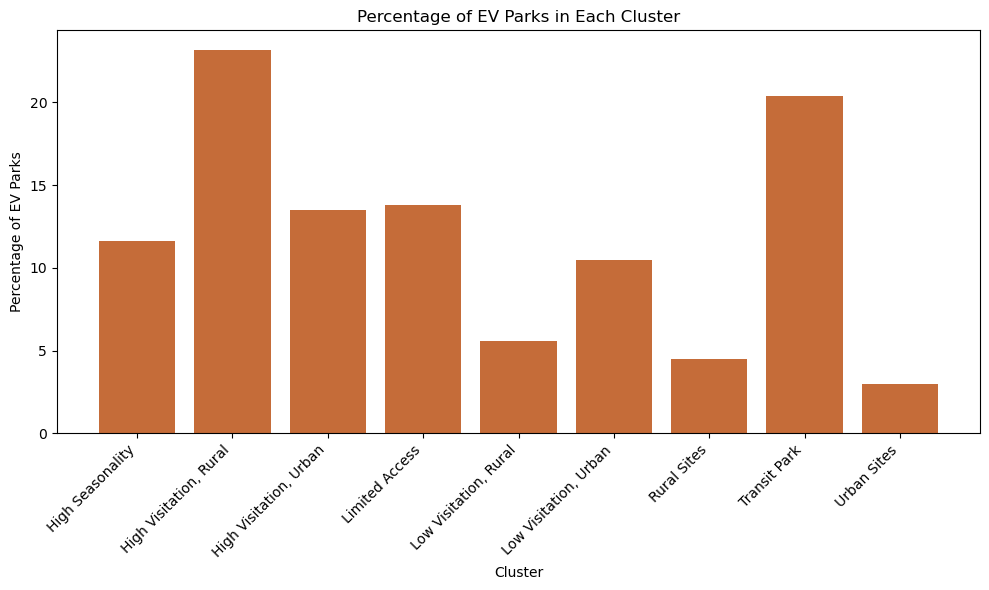

In [15]:
plt.figure(figsize=(10, 6)) 
plt.bar(label_counts['Label'], label_counts['Percent_EV'], color='#C56C39')
plt.xlabel('Cluster')
plt.ylabel('Percentage of EV Parks')
plt.title('Percentage of EV Parks in Each Cluster')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

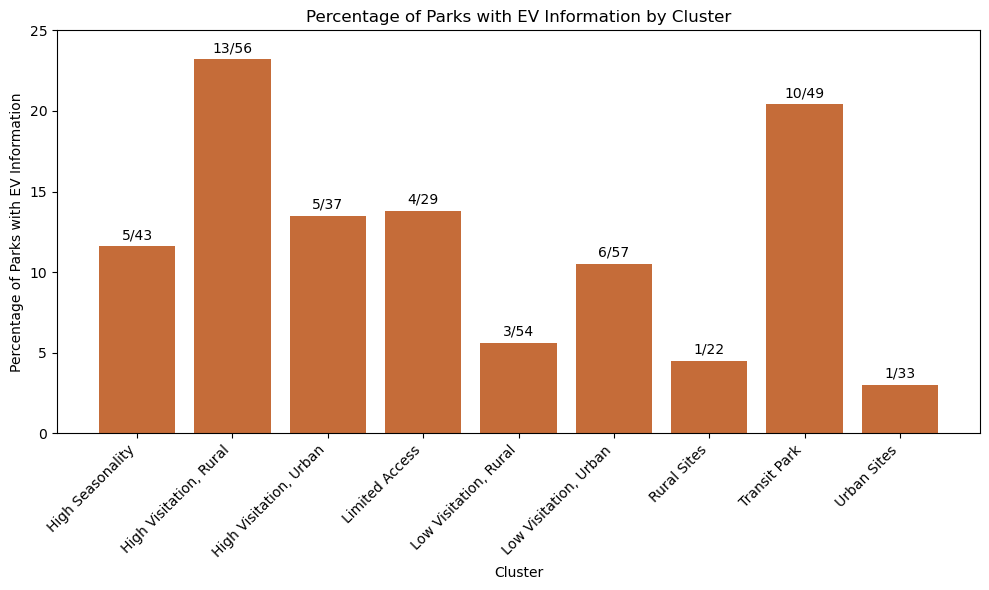

In [17]:
plt.figure(figsize=(10, 6)) 
bars = plt.bar(label_counts['Label'], label_counts['Percent_EV'], color='#C56C39')

for i, bar in enumerate(bars):
    ev_parks = label_counts['EV_Parks'].iloc[i]
    total_parks = label_counts['Total_Parks'].iloc[i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.25,
             f"{ev_parks}/{total_parks}",
             ha='center', va='bottom')
    
##avg_percent_ev = label_counts['Percent_EV'].mean()
##plt.axhline(y=avg_percent_ev, color='red', linestyle='--')

plt.xlabel('Cluster')
plt.ylabel('Percentage of Parks with EV Information')
plt.title('Percentage of Parks with EV Information by Cluster')
plt.xticks(rotation=45, ha='right') 
plt.ylim(0, 25)
plt.tight_layout()
plt.savefig("EVGraph.png")
plt.show()